In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline

In [10]:
res = pd.read_csv('cluster_test2.csv',parse_dates=True,index_col=0)
ret = pd.read_csv("../data/raw_response.csv",index_col=0,parse_dates=True)

In [11]:
res.groupby('Cluster').mean()

,Stock_Returns,Bond_Returns
Cluster,,
0,0.000347,0.000156
1,-0.001113,0.000667
2,0.000509,0.000177


In [4]:
def shrp_wts(x1,x2):
    x = np.array(x1)
    y = np.array(x2)
    
    r1 = np.mean(x)
    r2 = np.mean(y)
    var1 = np.var(x)
    var2 = np.var(y)
    c = np.cov(x,y)[0][1]
    
    w1  = (r1*var2 - r2*c) / (r1*var2 + r2*var1 - (r1+r2)*c)
    
    # limit extreme cases, prevent shorting
    if w1<0: w1 = 0
    if w1>1: w1 = 1
        
    w2 = 1-w1
    p = np.dot(np.column_stack((x,y)),np.array([w1,w2]))
    shrp = np.mean(p)/np.std(p)
    
    return (w1,w2,shrp)

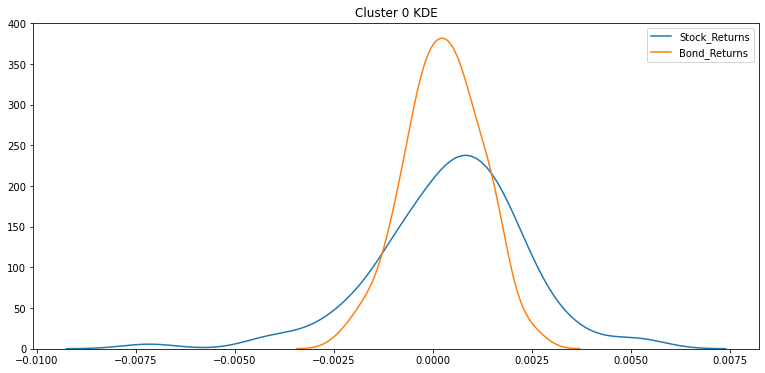

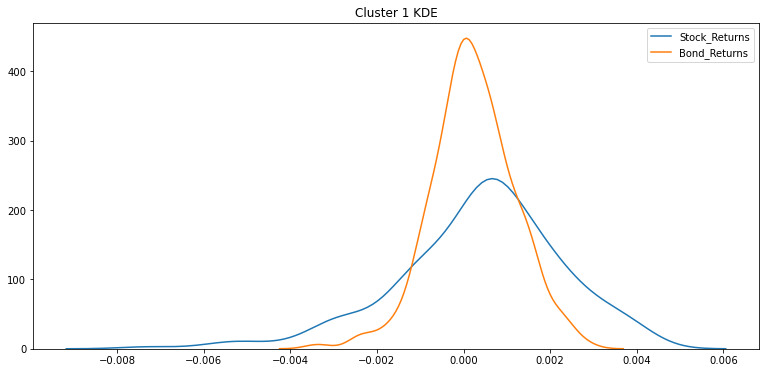

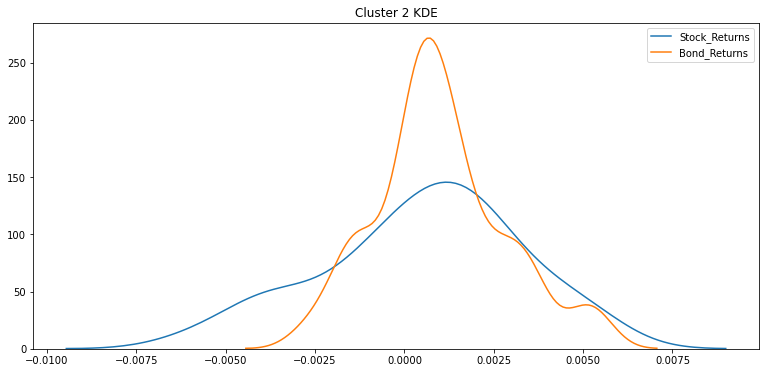

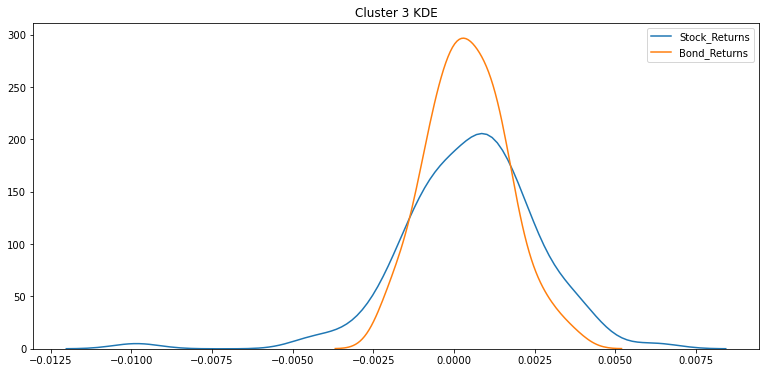

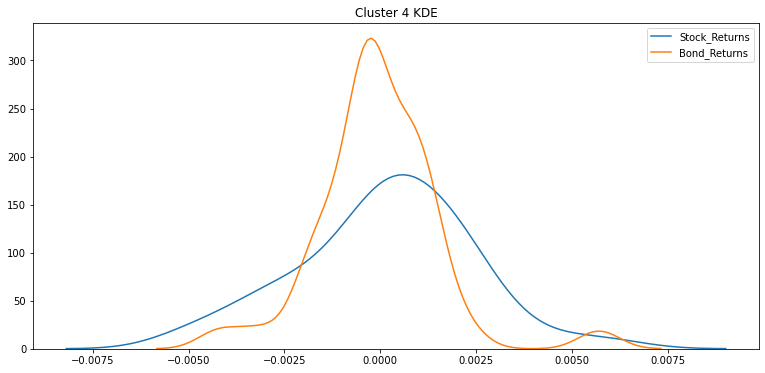

In [21]:
for c in np.sort(res.Cluster.unique()):
    plt.figure(figsize=(13,6))
    p1 = sns.kdeplot(res[res['Cluster']==c].Stock_Returns)
    p1 = sns.kdeplot(res[res['Cluster']==c].Bond_Returns)
    plt.title('Cluster {} KDE'.format(c))

In [31]:
out = []

for c in res.Cluster.unique():
    mask = ret.index.strftime('%m-%Y').isin(res[res['Cluster']==c].index.strftime('%m-%Y'))
    f = ret[mask]
    w1,w2,sh = shrp_wts(f.Stock_Returns,f.Bond_Returns)
    out.append((c,w1,w2,sh))
    

In [32]:
out

[(3, 0.12377375041747657, 0.8762262495825235, 0.0870983089842071),
 (4, 0, 1, -0.01035674018459331),
 (2, 0.102397485010361, 0.8976025149896389, 0.13572420701568422),
 (0, 0.27263593102960787, 0.7273640689703922, 0.08058909423628183),
 (1, 0.25363999895646133, 0.7463600010435387, 0.07053157335051959)]

In [ ]:
np.array(out)[:,3]*np.sqrt(252)

In [36]:
res.tail(36)

,Stock_Returns,Bond_Returns,Cluster,Cluster_PCA
2017-01-01,0.000895,0.000112,1,1
2017-02-01,0.001928,0.000520,1,1
2017-03-01,-0.000004,-0.000059,1,1
2017-04-01,0.000487,0.000610,1,1
2017-05-01,0.000535,0.000421,1,1
2017-06-01,0.000228,-0.000321,1,1
2017-07-01,0.000965,0.000145,1,1
2017-08-01,0.000040,0.000783,1,1
2017-09-01,0.000962,-0.000846,1,1
2017-10-01,0.001050,-0.000111,1,1
